<a href="https://colab.research.google.com/github/robyng15/Boolean-Models/blob/master/Yeast_Cell(6/28).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
file = open('yeast-cell.txt')
lines = file.readlines()

def list_gene_with_rule(locallines):
  length = len(locallines)
  keywds = ['or','and','not']
  gene_with_rule = []
  for i in range(length - 1):
    #print(lines[i+1])
    l = lines[i+1].strip('\n')
    gene_with_rule.append(l.split('\t'))
  return gene_with_rule
print(list_gene_with_rule(lines))

proteins = [item[0] for item in list_gene_with_rule(lines)]
rules = [item[1] for item in list_gene_with_rule(lines)]
#print(proteins)
#print(rules)

[['Cln3', '( )'], ['MBF', '( Cln3 not Clb1 )'], ['SBF', '( Cln3 not Clb1 )'], ['Cln1', '( SBF )'], ['Cdh1', '( Cdc20 not Cln1 or Clb5 or Clb1 )'], ['Swi5', '( Mcm1 or Cdc20 not Clb1 )'], ['Cdc20', '( Mcm1 or Clb1 )'], ['Clb5', '( MBF not Sic1 or Cdc20 )'], ['Sic1', '( Swi5 or Cdc20 not Cln1 or Clb5 or Clb1 )'], ['Clb1', '( Mcm1 or Clb5 not Cdc20 or Cdh1 or Sic1 )'], ['Mcm1', '( Clb5 or Clb1 )']]


In [2]:
# Function to return formula depending on protein_id
def get_formula(protein_id, lines):
  for rule in list_gene_with_rule(list(lines)):
    if protein_id == rule[0]:
      return(rule[1])
print(get_formula('Mcm1', list(lines)))

( Clb5 or Clb1 )


In [3]:
# Find activators and inhibitors
def find_activ_inhib(formula):
  #print(formula) 
  tokens = []
  inhibitors = []
  activators = []
  if formula == '( )':     #changes formula to rules
    return [activators, inhibitors]
  else:
    token = formula.split(' ')   # changes formula.split to rules.split
    for i in token:
      if i != '(' and i != ')' and i != 'not' and i != 'or':
        tokens.append(i) 
    for i in range(len(tokens)):
      if 'not' in token:
        if token.index(tokens[i]) < token.index('not'):
          activators.append(tokens[i])
        if token.index(tokens[i]) > token.index('not'):
          inhibitors.append(tokens[i])
      if 'not' not in token:
        activators.append(tokens[i])
    return([activators, inhibitors])
      
print(find_activ_inhib(get_formula('MBF', list(lines))))

[['Cln3'], ['Clb1']]


In [0]:
# Inhibition and activation arrows are switched (29)
def perturb_edge_reverse(proteins, activ_inhib):
  reverse_formula = []
  # Perturbs edge reverse for activators one at a time
  for k in range(len(rules)):
    activators = find_activ_inhib(rules[k])[0]
    inhibitors = find_activ_inhib(rules[k])[1]
    #print([activators, inhibitors])
    new_activ = []
    new_inhib = []
    perturb_activ = activators.copy()
    perturb_inhib = inhibitors.copy()
    for i in range(len(activators)):
      #print(activators[i])
      if len(activators) != 0:
        perturb_inhib.append(activators[i])
        perturb_activ.remove(activators[i])
        reverse_formula.append([proteins[k], [perturb_activ, perturb_inhib]])
        perturb_activ = activators
        perturb_inhib = inhibitors
   
  # Perturbs edge reverse for inhibitors one at a time
  for k in range(len(rules)):
    activators = find_activ_inhib(rules[k])[0]
    inhibitors = find_activ_inhib(rules[k])[1]
  #print([activators, inhibitors])
    new_activ = []
    new_inhib = []
    perturb_activ = activators.copy()
    perturb_inhib = inhibitors.copy()
    for j in range(len(list(inhibitors))):
      #print(inhibitors)
      if len(inhibitors) != 0:
        perturb_activ.append(inhibitors[j])
        perturb_inhib.remove(inhibitors[j])
        reverse_formula.append([proteins[k], [perturb_activ, perturb_inhib]])
        perturb_activ = list(activators)
        perturb_inhib = list(inhibitors)
  return reverse_formula

f = list()
for r in range(len(rules)):
  f.append(find_activ_inhib(rules[r]))
#print(f)

print(perturb_edge_reverse(proteins, f))
#print(len(perturb_edge_reverse(proteins, f)))

[['MBF', [[], ['Clb1', 'Cln3']]], ['SBF', [[], ['Clb1', 'Cln3']]], ['Cln1', [[], ['SBF']]], ['Cdh1', [[], ['Cln1', 'Clb5', 'Clb1', 'Cdc20']]], ['Swi5', [['Cdc20'], ['Clb1', 'Mcm1']]], ['Swi5', [['Mcm1'], ['Clb1', 'Cdc20']]], ['Cdc20', [['Clb1'], ['Mcm1']]], ['Cdc20', [['Mcm1'], ['Clb1']]], ['Clb5', [[], ['Sic1', 'Cdc20', 'MBF']]], ['Sic1', [['Cdc20'], ['Cln1', 'Clb5', 'Clb1', 'Swi5']]], ['Sic1', [['Swi5'], ['Cln1', 'Clb5', 'Clb1', 'Cdc20']]], ['Clb1', [['Clb5'], ['Cdc20', 'Cdh1', 'Sic1', 'Mcm1']]], ['Clb1', [['Mcm1'], ['Cdc20', 'Cdh1', 'Sic1', 'Clb5']]], ['Mcm1', [['Clb1'], ['Clb5']]], ['Mcm1', [['Clb5'], ['Clb1']]], ['MBF', [['Cln3', 'Clb1'], []]], ['SBF', [['Cln3', 'Clb1'], []]], ['Cdh1', [['Cdc20', 'Cln1'], ['Clb5', 'Clb1']]], ['Cdh1', [['Cdc20', 'Clb5'], ['Cln1', 'Clb1']]], ['Cdh1', [['Cdc20', 'Clb1'], ['Cln1', 'Clb5']]], ['Swi5', [['Mcm1', 'Cdc20', 'Clb1'], []]], ['Clb5', [['MBF', 'Sic1'], ['Cdc20']]], ['Clb5', [['MBF', 'Cdc20'], ['Sic1']]], ['Sic1', [['Swi5', 'Cdc20', 'Cln1'], ['

In [4]:
import numpy as np
# Perturbation by adding an edge to activator/inhibitor list one at a time (174)
def perturb_edge_add(proteins, activ_inhib):
  added_formula = []
  # Goes through activators, adds one at a time
  for i in range(len(rules)):
    activators = find_activ_inhib(rules[i])[0]
    inhibitors = find_activ_inhib(rules[i])[1]
    #print([activators, inhibitors])
    perturb_activ = activators.copy()
    for k in range(len(proteins)):
      if proteins[k] not in activators and proteins[k] not in inhibitors and proteins[k] != proteins[i]:
        perturb_activ.append(proteins[k])
        #print(perturb_activ)
        added_formula.append([proteins[i], [perturb_activ, inhibitors]])
        #print(added_formula)
        perturb_activ = list(activators)
      else:
        pass
  # Goes through list of inhibitors, adds one at a time      
  for i in range(len(rules)):
    activators = find_activ_inhib(rules[i])[0]
    inhibitors = find_activ_inhib(rules[i])[1]        
    perturb_inhib = inhibitors.copy()
    for k in range(len(proteins)):
      if proteins[k] not in inhibitors and proteins[k] not in activators and proteins[k] != proteins[i]:
        perturb_inhib.append(proteins[k])
        #print(perturb_inhib)
        added_formula.append([proteins[i], [activators, perturb_inhib]])
        #print(added_formula)
        perturb_inhib = list(inhibitors)
      else:
        pass 
  return added_formula
  
f = list()
for r in range(len(rules)):
  f.append(find_activ_inhib(rules[r]))
#print(f)
  
print(perturb_edge_add(proteins, f))
print(len(perturb_edge_add(proteins, f)))
#print(np.array(perturb_edge_add(proteins, f)))

[['Cln3', [['MBF'], []]], ['Cln3', [['SBF'], []]], ['Cln3', [['Cln1'], []]], ['Cln3', [['Cdh1'], []]], ['Cln3', [['Swi5'], []]], ['Cln3', [['Cdc20'], []]], ['Cln3', [['Clb5'], []]], ['Cln3', [['Sic1'], []]], ['Cln3', [['Clb1'], []]], ['Cln3', [['Mcm1'], []]], ['MBF', [['Cln3', 'SBF'], ['Clb1']]], ['MBF', [['Cln3', 'Cln1'], ['Clb1']]], ['MBF', [['Cln3', 'Cdh1'], ['Clb1']]], ['MBF', [['Cln3', 'Swi5'], ['Clb1']]], ['MBF', [['Cln3', 'Cdc20'], ['Clb1']]], ['MBF', [['Cln3', 'Clb5'], ['Clb1']]], ['MBF', [['Cln3', 'Sic1'], ['Clb1']]], ['MBF', [['Cln3', 'Mcm1'], ['Clb1']]], ['SBF', [['Cln3', 'MBF'], ['Clb1']]], ['SBF', [['Cln3', 'Cln1'], ['Clb1']]], ['SBF', [['Cln3', 'Cdh1'], ['Clb1']]], ['SBF', [['Cln3', 'Swi5'], ['Clb1']]], ['SBF', [['Cln3', 'Cdc20'], ['Clb1']]], ['SBF', [['Cln3', 'Clb5'], ['Clb1']]], ['SBF', [['Cln3', 'Sic1'], ['Clb1']]], ['SBF', [['Cln3', 'Mcm1'], ['Clb1']]], ['Cln1', [['SBF', 'Cln3'], []]], ['Cln1', [['SBF', 'MBF'], []]], ['Cln1', [['SBF', 'Cdh1'], []]], ['Cln1', [['SBF', 

In [0]:
import numpy as np
# Perturbation by removing an edge from activator/inhibitor list (34)
def perturb_edge_delete(proteins, activ_inhib):
  deleted_formula = []
  # Goes through list of activators, deletes one at a time
  for i in range(len(rules)):
    activators = find_activ_inhib(rules[i])[0]
    inhibitors = find_activ_inhib(rules[i])[1]
    #print([activators, inhibitors])
    perturb_activ = activators.copy()
    for k in range(len(proteins)):
      if proteins[k] in activators:
        perturb_activ.remove(proteins[k])
        deleted_formula.append([proteins[i], [perturb_activ, inhibitors]])
        #print(deleted_formula)
        perturb_activ = list(activators)
      else:
        pass
  # Goes through list of inhibitors, deletes one at a time        
  for i in range(len(rules)):
    activators = find_activ_inhib(rules[i])[0]
    inhibitors = find_activ_inhib(rules[i])[1]
    perturb_inhib = inhibitors.copy()
    for k in range(len(proteins)):
      if proteins[k] in inhibitors:
        perturb_inhib.remove(proteins[k])
        deleted_formula.append([proteins[i], [activators, perturb_inhib]])
        perturb_inhib = list(inhibitors)
      else:    
        pass   
  return deleted_formula

f = list()
for r in range(len(rules)):
  f.append(find_activ_inhib(rules[r]))
#print(f)
  
print(perturb_edge_delete(proteins, f))
print(len(perturb_edge_delete(proteins, f)))
#print(np.array(perturb_edge_delete(proteins, f)))

[['MBF', [[], ['Clb1']]], ['SBF', [[], ['Clb1']]], ['Cln1', [[], []]], ['Cdh1', [[], ['Cln1', 'Clb5', 'Clb1']]], ['Swi5', [['Mcm1'], ['Clb1']]], ['Swi5', [['Cdc20'], ['Clb1']]], ['Cdc20', [['Mcm1'], []]], ['Cdc20', [['Clb1'], []]], ['Clb5', [[], ['Sic1', 'Cdc20']]], ['Sic1', [['Cdc20'], ['Cln1', 'Clb5', 'Clb1']]], ['Sic1', [['Swi5'], ['Cln1', 'Clb5', 'Clb1']]], ['Clb1', [['Mcm1'], ['Cdc20', 'Cdh1', 'Sic1']]], ['Clb1', [['Clb5'], ['Cdc20', 'Cdh1', 'Sic1']]], ['Mcm1', [['Clb1'], []]], ['Mcm1', [['Clb5'], []]], ['MBF', [['Cln3'], []]], ['SBF', [['Cln3'], []]], ['Cdh1', [['Cdc20'], ['Clb5', 'Clb1']]], ['Cdh1', [['Cdc20'], ['Cln1', 'Clb1']]], ['Cdh1', [['Cdc20'], ['Cln1', 'Clb5']]], ['Swi5', [['Mcm1', 'Cdc20'], []]], ['Clb5', [['MBF'], ['Sic1']]], ['Clb5', [['MBF'], ['Cdc20']]], ['Sic1', [['Swi5', 'Cdc20'], ['Clb5', 'Clb1']]], ['Sic1', [['Swi5', 'Cdc20'], ['Cln1', 'Clb1']]], ['Sic1', [['Swi5', 'Cdc20'], ['Cln1', 'Clb5']]], ['Clb1', [['Mcm1', 'Clb5'], ['Cdc20', 'Sic1']]], ['Clb1', [['Mcm1', 

In [51]:
# Compute protein state for original model
def compute_protein_state(prot, net_state):
  for i in range(len(list_gene_with_rule(lines))):
    regs = [i[0] for i in list_gene_with_rule(lines)]
    if regs[i] == prot:
      formula = get_formula(list_gene_with_rule(lines)[i][0], list(lines))
      #print(find_activ_inhib(formula)[0])
      activators = find_activ_inhib(formula)[0]
      inhibitors = find_activ_inhib(formula)[1]
      break
#   print(formula)  
#   print(activators)
#   print(inhibitors)

  # Sets activators to 1 if on, and inhibitors to -1 if on
  for i in activators:
    if len(i) != 0:
      if net_state[proteins.index(i)] == 1:
        activators[activators.index(i)] = 1
      else:
        activators[activators.index(i)] = 0
    else:
      activators[activators.index(i)] = 0
  for i in inhibitors:
    if len(i) != 0:
      if net_state[proteins.index(i)] == 1:
        inhibitors[inhibitors.index(i)] = -1
      else:
        inhibitors[inhibitors.index(i)] = 0
    else:
      inhibitors[inhibitors.index(i)] = 0
  #print(inhibitors)

  # Finds sum of activators list and inhibitors list
  if len(activators) == 0:
    sum_activators = 0
  else:
    sum_activators = sum(activators)
  #print(sum_activators)
  if len(inhibitors) == 0:
    sum_inhibitors = 0
  else:
    sum_inhibitors = sum(inhibitors)
  #print(sum_inhibitors)

  # Find sum of activators list with inhibitors list to assign value for state
  final_count = sum_activators + sum_inhibitors
  #print(final_count)
  if final_count == 0 and (len(inhibitors) == 0 or prot == 'Swi5'):
    return 0
  if final_count > 0:
    return 1
  if final_count < 0:
    return 0
  if final_count == 0:
    index = regs.index(prot)
    #print(index)
    return net_state[index]
      
print(compute_protein_state('Clb5', [0,1,0,0,0,0,0,1,1,0,0]))

1


In [56]:
import numpy as np
# Find new rule for add edge
def find_new_rule_add(prot, new_activ_inhib):
  f = list()
  new_list = []
  for r in range(len(rules)):
    f.append(find_activ_inhib(rules[r]))
  perturbed_activ_inhib = perturb_edge_add(proteins, f)
  #print(perturbed_activ_inhib)
  for i in range(len(proteins)):
    for j in range(len(perturbed_activ_inhib)):
      if prot in perturbed_activ_inhib[j][0]:
        new_list.append(perturbed_activ_inhib[j][1])
    return new_list
  
print(find_new_rule_add('Cln3', perturb_edge_add(proteins, f)))
#print(len(find_new_rule_add('Cln3', perturb_edge_add(proteins, f))))
#print(np.array(find_new_rule_add('Mcm1', perturb_edge_add(proteins, f))))

[[['MBF'], []], [['SBF'], []], [['Cln1'], []], [['Cdh1'], []], [['Swi5'], []], [['Cdc20'], []], [['Clb5'], []], [['Sic1'], []], [['Clb1'], []], [['Mcm1'], []], [[], ['MBF']], [[], ['SBF']], [[], ['Cln1']], [[], ['Cdh1']], [[], ['Swi5']], [[], ['Cdc20']], [[], ['Clb5']], [[], ['Sic1']], [[], ['Clb1']], [[], ['Mcm1']]]


In [0]:
import numpy as np
# Find new rule for add edge
def find_new_rule_delete(prot, new_activ_inhib):
  f = list()
  new_list = []
  for r in range(len(rules)):
    f.append(find_activ_inhib(rules[r]))
  perturbed_activ_inhib = perturb_edge_delete(proteins, f)
  #print(perturbed_activ_inhib)
  for i in range(len(proteins)):
    for j in range(len(perturbed_activ_inhib)):
      if prot in perturbed_activ_inhib[j][0]:
        new_list.append(perturbed_activ_inhib[j][1])
    return new_list
  
print(find_new_rule_delete('Mcm1', perturb_edge_delete(proteins, f)))
print(len(find_new_rule_delete('Mcm1', perturb_edge_delete(proteins, f))))
#print(np.array(find_new_rule_delete('Mcm1', perturb_edge_delete(proteins, f))))

[[['Clb1'], []], [['Clb5'], []]]
2


In [0]:
def state_conditions()
# Sets activators to 1 if on, and inhibitors to -1 if on
    for i in activators:
      if len(activators) != 0:
        if net_state[activators.index(i)] == 1:
          activators[activators.index(i)] = 1
        else:
          activators[activators.index(i)] = 0
      else:
        activators[activators.index(i)] = 0

    for j in inhibitors:
      if len(inhibitors) != 0:
        if net_state[inhibitors.index(i)] == 1:
          inhibitors[inhibitors.index(i)] = -1
        else:
          inhibitors[inhibitors.index(i)] = 0
      else:
        inhibitors[inhibitors.index(i)] = 0
    #print(inhibitors)

    # Finds sum of activators list and inhibitors list
    if len(activators) == 0:
      sum_activators = 0
    else:
      sum_activators = sum(activators)
    #print(sum_activators)
    if len(inhibitors) == 0:
      sum_inhibitors = 0
    else:
      sum_inhibitors = sum(inhibitors)
    #print(sum_inhibitors)

    # Find sum of activators list with inhibitors list to assign value for state
    final_count = sum_activators + sum_inhibitors
    #print(final_count)
    if final_count == 0 and (len(inhibitors) == 0 or prot == 'Swi5'):
      return 0
    if final_count > 0:
      return 1
    if final_count < 0:
      return 0
    if final_count == 0:
      index = regs.index(prot)
      return net_state[index]

In [88]:
# Compute protein state for perturbations
def compute_protein_state(#rules, net_state):#gene_with_rule, rules, net_state):
  regs = [i[0] for i in list_gene_with_rule(lines)]
  # Activators and inhibitors for perturbed - activators and inhibitors reversed
#   for j in range(len(perturb_edge_reverse(proteins, f))):
#     activators = [j[1][0] for j in perturb_edge_reverse(proteins, f)]
#     inhibitors = [j[1][1] for j in perturb_edge_reverse(proteins, f)]
  #print(activators)
  #print(len(activators))
  #print([activators, inhibitors])
  
#   # Activators and inhibitors for perturbed - added edges
#   for i in range(len(proteins)):
#     new_rule = find_new_rule_add(proteins[i], perturb_edge_add(proteins, f))
#     activators = new_rule[0][0]
#     inhibitors = new_rule[0][1]
#     #print(activators)
#     #print(inhibitors)
  #print(rules)
  for i in range(len(rules)):
    activators = rules[i][0]
    inhibitors = rules[i][1] 
    print(activators)
    print(inhibitors)
    
  # Activators and inhibitors for perturbed - deleted edges
#   for i in range(len(proteins)):
#     new_rule = find_new_rule_delete(proteins[i], perturb_edge_delete(proteins, f))
#     print(new_rule)
#     activators = new_rule[0][0]
#     inhibitors = new_rule[1][1]
#   #print(activators)
#   #print(inhibitors)
      
print(compute_protein_state( find_new_rule_add('Cln3', perturb_edge_add(proteins, f)), [0,0,0,0,0,0,1,0,0,0,0]))#list_gene_with_rule(lines), find_new_rule_add('Cln3', perturb_edge_add(proteins, f)), [0,0,0,0,0,0,1,0,0,0,0]))

['MBF']
[]
['SBF']
[]
['Cln1']
[]
['Cdh1']
[]
['Swi5']
[]
['Cdc20']
[]
['Clb5']
[]
['Sic1']
[]
['Clb1']
[]
['Mcm1']
[]
[]
['MBF']
[]
['SBF']
[]
['Cln1']
[]
['Cdh1']
[]
['Swi5']
[]
['Cdc20']
[]
['Clb5']
[]
['Sic1']
[]
['Clb1']
[]
['Mcm1']
None


In [53]:
def compute_next_protein_state_synchronous(gene_with_rule, net_state, lines):
  next_state_list = list(net_state)
  prot = [i[0] for i in gene_with_rule]
  #print(prot)
  #print(proteins)
  for i in range(len(proteins)):
    formula = get_formula(proteins[i], lines)
    #new_state_value = compute_protein_state(prot[i], net_state)
    new_state_value = compute_protein_state(list_gene_with_rule(lines), find_new_rule_add(proteins[i], perturb_edge_add(proteins, f)), net_state)
    next_state_list[i] = new_state_value
  return next_state_list

print(compute_next_protein_state_synchronous(list_gene_with_rule(lines), [0,0,0,1,0,1,1,1,1,0,0], lines))

ValueError: ignored

In [8]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx

def compute_state_space_network_synchronous(gene_with_rule, net_state):
  # creates a list of all the possible states depending on amt of proteins
  all_states = list(map(list, itertools.product([0, 1], repeat = len(proteins))))
  #print(len(all_states))
  start_state = all_states[0]
  used_states = all_states[0]
  edgelist = []
  for start_state in all_states:
    next_state_space = compute_next_protein_state_synchronous(gene_with_rule, 
                                                              start_state, 
                                                                lines)
    edgelist.append((start_state, next_state_space))
  return edgelist

output = compute_state_space_network_synchronous(list_gene_with_rule(lines), [0,0,0,0,0,0,0,0,0,0,0])
print(output)
print(len(output))

[([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0,

[('00000000000', '00000000000'), ('00000000001', '00000110010'), ('00000000010', '00000010011'), ('00000000011', '00000010011'), ('00000000100', '00000000100'), ('00000000101', '00000110100'), ('00000000110', '00000010001'), ('00000000111', '00000010011'), ('00000001000', '00000001011'), ('00000001001', '00000111011'), ('00000001010', '00000011011'), ('00000001011', '00000011011'), ('00000001100', '00000000001'), ('00000001101', '00000110011'), ('00000001110', '00000010011'), ('00000001111', '00000010011'), ('00000010000', '00001100100'), ('00000010001', '00001110100'), ('00000010010', '00000010001'), ('00000010011', '00000110011'), ('00000010100', '00001100100'), ('00000010101', '00001110100'), ('00000010110', '00000010101'), ('00000010111', '00000110101'), ('00000011000', '00000100001'), ('00000011001', '00000110011'), ('00000011010', '00000010011'), ('00000011011', '00000110011'), ('00000011100', '00000100101'), ('00000011101', '00000110101'), ('00000011110', '00000010001'), ('00000

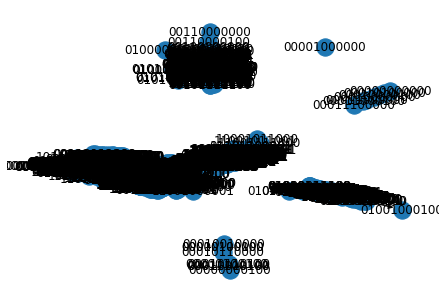

In [0]:
# Edgelist for unperturbed
edgelist = []
for seq in output:
  sequence = seq
  edgelist.append((''.join([str(st) for st in seq[0]]),
                   ''.join([str(st) for st in seq[1]])))
print(edgelist)
G = nx.DiGraph(edgelist)
#print(list(nx.simple_cycles(G)))
nx.draw_spring(G, with_labels=True)
  
#plt.savefig('state_space_network_synchronous_yeast.png')

[('00000000000', '00000000000'), ('00000000001', '00000000000'), ('00000000010', '00000000000'), ('00000000011', '00000000000'), ('00000000100', '00000000000'), ('00000000101', '00000000000'), ('00000000110', '00000000000'), ('00000000111', '00000000000'), ('00000001000', '00000000000'), ('00000001001', '00000000000'), ('00000001010', '00000000000'), ('00000001011', '00000000000'), ('00000001100', '00000000000'), ('00000001101', '00000000000'), ('00000001110', '00000000000'), ('00000001111', '00000000000'), ('00000010000', '00000000000'), ('00000010001', '00000000000'), ('00000010010', '00000000000'), ('00000010011', '00000000000'), ('00000010100', '00000000000'), ('00000010101', '00000000000'), ('00000010110', '00000000000'), ('00000010111', '00000000000'), ('00000011000', '00000000000'), ('00000011001', '00000000000'), ('00000011010', '00000000000'), ('00000011011', '00000000000'), ('00000011100', '00000000000'), ('00000011101', '00000000000'), ('00000011110', '00000000000'), ('00000

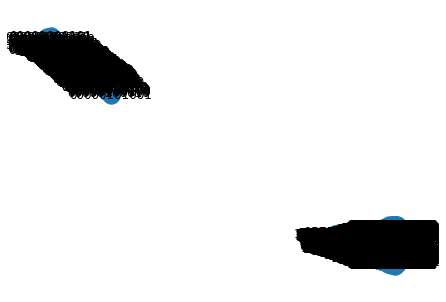

In [9]:
# Edgelist for perturbed added edges
edgelist_add = []
for seq in output:
  sequence = seq
  edgelist_add.append((''.join([str(st) for st in seq[0]]),
                   ''.join([str(st) for st in seq[1]])))
print(edgelist_add)
G_add = nx.DiGraph(edgelist_add)
nx.draw_spring(G_add, with_labels=True)

In [10]:
# Limit Cycle Sync
def find_limit_cycle(G_add):
  limit_cycle = list()
  cycle = list(nx.simple_cycles(G_add))
  return cycle

print(find_limit_cycle(G_add))
#print(len(find_limit_cycle(G)))

[['00000000000'], ['11111111111']]


In [11]:
# Actual Limit Cycle Sync
def find_longer_list(G_add):
  limit_cycle = find_limit_cycle(G_add)
  long_limit_cycle = []
  for i in limit_cycle:
    if len(i) != 1:
      long_limit_cycle.append(i)
      return long_limit_cycle

print(find_longer_list(G_add))

None


In [12]:
# Self Cycles Sync
def find_self_cycle(G_add):
  self_cycle = []
  G_add = nx.DiGraph(edgelist_add)
  self_loop_edges = list(nx.selfloop_edges(G_add))
  state = [node[0] for node in self_loop_edges]
  return state

print(find_self_cycle(G_add))
#print(len(find_self_cycle(G)))

['00000000000', '11111111111']


In [13]:
# Find steady states Sync
def find_steady_states(G_add):
  steady_states = []
  for node in G_add.nodes():
    if len(list(G_add.neighbors(node))) == 0 or len(list(G_add.neighbors(node))) == 1 and (node in G_add.neighbors(node)):
      steady_states.append(node)
  return steady_states
print(find_steady_states(G_add))
print(len(find_steady_states(G_add)))

['00000000000', '11111111111']
2


In [0]:
def has_cell_cycle():
  cell_cycle = [('10001000100', '01101000100'), 
                ('01101000100', '01111000100'), 
                ('01111000100', '01110000000'), 
                ('01110000000', '01110001000'), 
                ('01110001000', '01110001011'), 
                ('01110001011', '00010011011'), 
                ('00010011011', '00000110011'), 
                ('00000110011', '00000110111'), 
                ('00000110111', '00000110101'),
                ('00000110101', '00001110100'), 
                ('00001110100', '00001100100'), 
                ('00001100100', '00001000100')]
  for i in range(len()):
    if G.has_path([0], [1]):
      .append(True)
    else:
      .append(False)

In [0]:
# Find basin size unperturbed network
def basin_size(G):
  nodes = G.nodes()
  count = 0
  all_states = all_states = list(map(list, itertools.product([0, 1], repeat = len(proteins))))
  for i in range(len(all_states)):
    all_states[i] = ''.join(str(j) for j in all_states[i])
  for i in range(len(all_states)):
    if nx.has_path(G, all_states[i], '00001000100'):
      count += 1
  return count
  
print(basin_size(G))

1764


In [14]:
# Find basin size perturbed add edges
def basin_size(G_add):
  nodes = G_add.nodes()
  count = 0
  all_states = all_states = list(map(list, itertools.product([0, 1], repeat = len(proteins))))
  for i in range(len(all_states)):
    all_states[i] = ''.join(str(j) for j in all_states[i])
  for i in range(len(all_states)):
    if nx.has_path(G_add, all_states[i], '00001000100'):
      count += 1
  return count
  
print(basin_size(G_add))

1


In [22]:
def create_txt_perturbation(edgelist_add, G_add):
  file_name = open('yeast_synchronous_perturbed_add.txt', 'w+')
  file_name.write('Action\tBasin_Size\tCell_Cycle_Present\tNumber_of_Steady_States\n')
  
  Action = "{\"Action\": {'spec': {'bool': '%s'},"
  Basin_Size = "\"Basin_Size\": {'spec': {'size': '%s'},"
  Cell_Cyle_Present = "\"Cell_Cycle_Present\": {'spec': {\"bool\": '%s'},"
  Number_of_Steady_States = "\"Number_of_Steady_States\": {'spec': {\"number\": '%s'}}\n"
  
  #for i in range(len())
  
  #file_name.write("%s\t%s\t%s\t%s\t" % ())
  file_name.close()
  
print(create_txt_perturbation(edgelist_add, G_add))

None


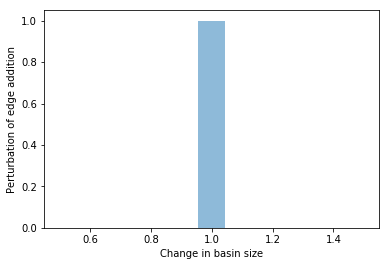

None


In [0]:
import matplotlib.pyplot as plt
def hist_perturb_add(G_add):  #??
  #basin_change = (basin_size(G) - basin_size(G_add)) / (basin_size(G))
  basin_change = (1764 - basin_size(G_add)) / 1764
  num_bins = 11
  plt.hist(basin_change, num_bins, alpha=0.5)
  plt.title('')
  plt.xlabel('Change in basin size')
  plt.ylabel('Perturbation of edge addition')
  plt.show()
  
print(hist_perturb_add(G_add)) #??

In [17]:
# Graphspace Synchronous
def graphspace_synchronous(edgelist_add, G_add):
  nodes = G_add.nodes()
  edges = G_add.edges()
  limit_cycle = find_longer_list(G_add)
  steady_states = find_steady_states(G_add)
  #random_walk = individual_random_walk(nodes)
  #edges_count = count_edges(G)
  #scaled_edges = max_count_edges(G)
  #nodes_count = count_nodes(G)
  #scaled_nodes = max_count_nodes(G)
  
  file_name = open('yeast_synchronous_add.txt', 'w+')
  file_name.write('head\ttail\thead_label\ttail_label\tedge_popup\tstyle\n')

  head = "{\"head\": {'spec': {'shape': '%s','color': '%s','border': \"black\"}, \"id\": '%s'},"
  tail = "\"tail\": {'spec': {'shape': '%s','color': '%s','border': \"black\"}, \"id\": '%s'},"
  edge = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle', \"color\": '%s'}, \"id\": '%s-%s'}}\n"

  style = head + tail + edge 

  for i in range(0, len(edgelist_add)):
    if limit_cycle != None:
      if edgelist_add[i][0] in limit_cycle:
        edge_color = 'blue'
      else:
        edge_color = 'grey'
    else:
      edge_color = 'grey'
    
    if edgelist_add[i][0] in steady_states:
      shape1 = 'rectangle'
      color1 = 'red'
      edge_color = 'grey'
    else:
      shape1 = 'ellipse'
      color1 = 'grey'
      edge_color = 'grey'
    
    if edgelist_add[i][1] in steady_states:
      shape2 = 'rectangle'
      color2 = 'red'
    else:
      shape2 = 'ellipse'
      color2 = 'grey'   
      
#     if edgelist[i] in scaled_edges.keys():
#       if scaled_edges[edgelist[i]] == 0.0:
#         edge_width = 1.0
#       else:
#         edge_width = scaled_edges[edgelist[i]]
      
#     if edgelist[i][0] in scaled_nodes.keys():
#       if scaled_nodes[edgelist[i][0]] == 0.0:
#         opacity1 = 0.25
#       else:
#         opacity1 = scaled_nodes[edgelist[i][0]]

#     if edgelist[i][1] in scaled_nodes.keys():
#       if scaled_nodes[edgelist[i][1]] == 0.0:
#         opacity2 = 0.25
#       else:
#         opacity2 = scaled_nodes[edgelist[i][1]]
     
      
    file_name.write("%s\t%s\t%s\t%s\t-\t" % (edgelist_add[i][0], edgelist_add[i][1], edgelist_add[i][0], edgelist_add[i][1]))
#     file_name.write(style % (shape1, color1, opacity1, edgelist[i][0], shape2, color2, opacity2, edgelist[i][1], 
#                              edge_color, edge_width, edgelist[i][0], edgelist[i][1]))
    file_name.write(style % (shape1, color1, edgelist_add[i][0], shape2, color2, edgelist_add[i][1],
                              edge_color, edgelist_add[i][0], edgelist_add[i][1]))
    
  file_name.close()   
print(graphspace_synchronous(edgelist_add, G_add))

None


In [18]:
file_name = open('yeast_synchronous_add.txt', 'r+')
print(file_name.read())

head	tail	head_label	tail_label	edge_popup	style
00000000000	00000000000	00000000000	00000000000	-	{"head": {'spec': {'shape': 'rectangle','color': 'red','border': "black"}, "id": '00000000000'},"tail": {'spec': {'shape': 'rectangle','color': 'red','border': "black"}, "id": '00000000000'},"edge": {'spec': {"target-arrow-shape": 'triangle', "color": 'grey'}, "id": '00000000000-00000000000'}}
00000000001	00000000000	00000000001	00000000000	-	{"head": {'spec': {'shape': 'ellipse','color': 'grey','border': "black"}, "id": '00000000001'},"tail": {'spec': {'shape': 'rectangle','color': 'red','border': "black"}, "id": '00000000000'},"edge": {'spec': {"target-arrow-shape": 'triangle', "color": 'grey'}, "id": '00000000001-00000000000'}}
00000000010	00000000000	00000000010	00000000000	-	{"head": {'spec': {'shape': 'ellipse','color': 'grey','border': "black"}, "id": '00000000010'},"tail": {'spec': {'shape': 'rectangle','color': 'red','border': "black"}, "id": '00000000000'},"edge": {'spec': {"tar